<a href="https://colab.research.google.com/github/lekshmi29-lx/Exit_Exam/blob/main/Exit_exam_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
data = pd.read_excel("/content/partpdf_1763620814447_airbnb.xlsx")
data.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
1,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
2,1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
3,1783,2008-08-12,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
4,2078,2008-08-15,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30475 entries, 0 to 30474
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Host Id                     30475 non-null  int64         
 1   Host Since                  30475 non-null  datetime64[ns]
 2   Name                        30475 non-null  object        
 3   Neighbourhood               30475 non-null  object        
 4   Property Type               30472 non-null  object        
 5   Review Scores Rating (bin)  22155 non-null  float64       
 6   Room Type                   30475 non-null  object        
 7   Zipcode                     30341 non-null  float64       
 8   Beds                        30390 non-null  float64       
 9   Number of Records           30475 non-null  int64         
 10  Number Of Reviews           30475 non-null  int64         
 11  Price                       30475 non-null  int64     

In [164]:
data['Host Since'] = pd.to_datetime(data['Host Since'])

#Note
Feature: Calculate the number of days, months, or years the host has been active.

Value:More experienced hosts may set higher (or sometimes more competitive) prices.

In [165]:
data['host_tenure_days'] = (pd.to_datetime('today') - data['Host Since']).dt.days
data['host_tenure_years'] = data['host_tenure_days'] / 365.25


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30475 entries, 0 to 30474
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Host Id                     30475 non-null  int64         
 1   Host Since                  30475 non-null  datetime64[ns]
 2   Name                        30475 non-null  object        
 3   Neighbourhood               30475 non-null  object        
 4   Property Type               30472 non-null  object        
 5   Review Scores Rating (bin)  22155 non-null  float64       
 6   Room Type                   30475 non-null  object        
 7   Zipcode                     30341 non-null  float64       
 8   Beds                        30390 non-null  float64       
 9   Number of Records           30475 non-null  int64         
 10  Number Of Reviews           30475 non-null  int64         
 11  Price                       30475 non-null  int64     

In [167]:
data.isna().sum()

,0
Host Id,0
Host Since,0
Name,0
Neighbourhood,0
Property Type,3
Review Scores Rating (bin),8320
Room Type,0
Zipcode,134
Beds,85
Number of Records,0


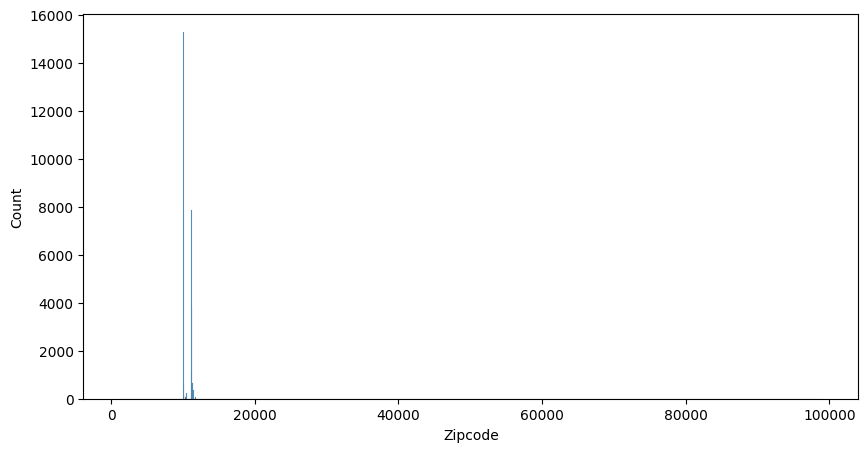

In [168]:
plt.figure(figsize=(10,5))
sns.histplot(data['Zipcode'])
plt.show()

#Note
Here the Review Scores Rating is skewed. So Median imputation is generally preferred over mean if the rating distribution is skewed, as it is less sensitive to outliers.

In [169]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy='median')
data['Review Scores Rating']= median_imputer.fit_transform(data[['Review Scores Rating']])

In [170]:
data = data.drop('Review Scores Rating (bin)',axis=1)

In [171]:
data['Beds']= median_imputer.fit_transform(data[['Beds']])

In [172]:
data['Zipcode'] = median_imputer.fit_transform(data[['Zipcode']])

In [173]:
data['Property Type'] = data['Property Type'].replace(' ',np.nan)
data.loc[:,'Property Type'] = data['Property Type'].fillna(data['Property Type'].mode()[0])

In [174]:
data.isna().sum()

,0
Host Id,0
Host Since,0
Name,0
Neighbourhood,0
Property Type,0
Room Type,0
Zipcode,0
Beds,0
Number of Records,0
Number Of Reviews,0


In [175]:
data.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Room Type', 'Zipcode', 'Beds', 'Number of Records',
       'Number Of Reviews', 'Price', 'Review Scores Rating',
       'host_tenure_days', 'host_tenure_years'],
      dtype='object')

In [176]:
#combine Neighbourhood and Room Type
data['Neighbourhood_RoomType'] = data['Neighbourhood '] + '_' + data['Room Type']

In [177]:
data.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,host_tenure_days,host_tenure_years,Neighbourhood_RoomType
0,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,Entire home/apt,10024.0,3.0,1,0,199,94.0,6356,17.401780,Manhattan_Entire home/apt
1,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,Private room,10036.0,3.0,1,39,549,96.0,6356,17.401780,Manhattan_Private room
2,1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,Entire home/apt,11222.0,1.0,1,4,149,100.0,6327,17.322382,Brooklyn_Entire home/apt
3,1783,2008-08-12,Amazing Also,Manhattan,Apartment,Entire home/apt,10004.0,1.0,1,9,250,100.0,6309,17.273101,Manhattan_Entire home/apt
4,2078,2008-08-15,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,Private room,11201.0,1.0,1,80,90,94.0,6306,17.264887,Brooklyn_Private room


In [178]:
data.nunique()

,0
Host Id,24418
Host Since,2240
Name,29414
Neighbourhood,5
Property Type,19
Room Type,3
Zipcode,188
Beds,14
Number of Records,1
Number Of Reviews,205


In [179]:
data = data.drop('Name',axis=1)

In [180]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

cat_column = ['Neighbourhood ','Property Type','Room Type','Neighbourhood_RoomType']
encoder = OrdinalEncoder()
data[cat_column] = encoder.fit_transform(data[cat_column])

In [181]:
basic_features = ['Beds', 'Number of Records', 'Number Of Reviews','host_tenure_days', 'host_tenure_years','Neighbourhood ','Property Type','Room Type']
#new_features = ['Beds', 'Number of Records', 'Number Of Reviews','host_tenure_days', 'host_tenure_years','Neighbourhood ','Property Type','Room Type','Neighbourhood_RoomType']

X_basic = data[basic_features]
y = data['Price']

In [182]:
from sklearn.model_selection import  train_test_split

Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_basic, y, test_size=0.2, random_state=42)
#Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [183]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

# Model without interaction feature
rf_basic = RandomForestRegressor(random_state=42)
rf_basic.fit(Xb_train, yb_train)
y_pred_basic = rf_basic.predict(Xb_test)
rmse_basic = root_mean_squared_error(yb_test, y_pred_basic)
print('RMSE without interaction feature:',(rmse_basic))


The model with the Neighbourhood_RoomType interaction feature achieved an RMSE of 186.83, compared to 188.588 for the model without it.

An RMSE of 188.588 means: On average, predictions differ from the true price by about 188.59.
An RMSE of 186.83 means: On average, predictions differ from the true price by about 186.83.

In conclusion, the interaction feature has improved model accuracy slightly.

In [186]:
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

new_features = ['Beds', 'Number of Records', 'Number Of Reviews','host_tenure_days', 'host_tenure_years','Neighbourhood ','Property Type','Room Type','Neighbourhood_RoomType']
X_new = data[new_features]
y = data['Price']

Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

rf_new = RandomForestRegressor(random_state=42)
rf_new.fit(Xn_train, yn_train)
y_pred_new = rf_new.predict(Xn_test)

rmse_new = root_mean_squared_error(yn_test, y_pred_new)
print('RMSE with interaction feature:',(rmse_new))

RMSE with interaction feature: 186.83453135219756


The final Random Forest Regressor model achieved an RMSE of 186.83.

If the RMSE is 186.83, it means that, on average, the model’s price predictions for a listing are off by about 186.83 compared to the actual price.

This means the model’s price predictions, on average, may differ from actual listing prices by approximately 186.83. While this error margin is reasonable given the range and variability in the data, it suggests there is still room for improvement, either through additional data, more granular features, or advanced modeling techniques.

The results demonstrate that interaction features like Neighbourhood_RoomType can help capture subtle relationships in the data—such as certain room types being priced differently in specific areas—that basic features alone might miss. For Airbnb hosts or analysts, the model provides a valuable pricing estimate, but should be used as a guideline alongside market research and business judgment.